In [38]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("data.csv", delimiter=",")
df.head()

,Angle,Azimuth,H RCS (f = 180 MHz),H RCS (f = 350 MHz),V RCS (f=180 MHz),V RCS (f=350 MHz),missile
0,89.010147,0.0,2.051400,2.660000e-25,3.804121,9.190000e-25,agm86c
1,90.546584,0.5,1.734656,2.213781e-03,3.744950,4.226930e-04,agm86c
2,93.680049,1.0,1.272543,1.269226e-02,3.539431,5.275043e-03,agm86c
3,91.802465,1.5,1.544475,2.268877e-02,3.547722,6.401292e-03,agm86c
4,95.582702,2.0,0.975898,6.333399e-02,3.229333,3.343697e-02,agm86c


In [ ]:
df.missile.unique()

In [40]:
X = df.drop(['missile'], axis=1)
y = df['missile']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
#criterion gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
clf_gini.fit(X_train,y_train)
y_pred_gini = clf_gini.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0:4f}', format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}', format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: {0:0:4f} 0.7112970711297071
Training-set accuracy score: {0:0.4f} 0.7494824016563147


<function matplotlib.pyplot.show(close=None, block=None)>

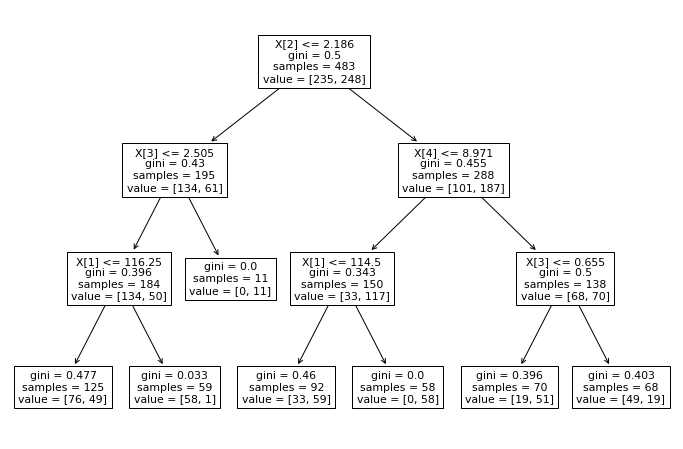

In [46]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show

In [ ]:
features = ['Angle','Azimuth','H RCS (f = 180 MHz)','H RCS (f = 350 MHz)','V RCS (f=180 MHz)','V RCS (f=350 MHz)']
classnames = ['agm86c','kepd350']

tree.export_graphviz(clf_gini,
                     out_file="treegini.dot",
                     feature_names = features, 
                     class_names=classnames,
                     filled = True)
#dot -Tpng tree.dot -o tree.png
#in anaconda prompt to convert tree.dot into tree.png

In [47]:
#criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.8201
Training-set accuracy score: 0.9048


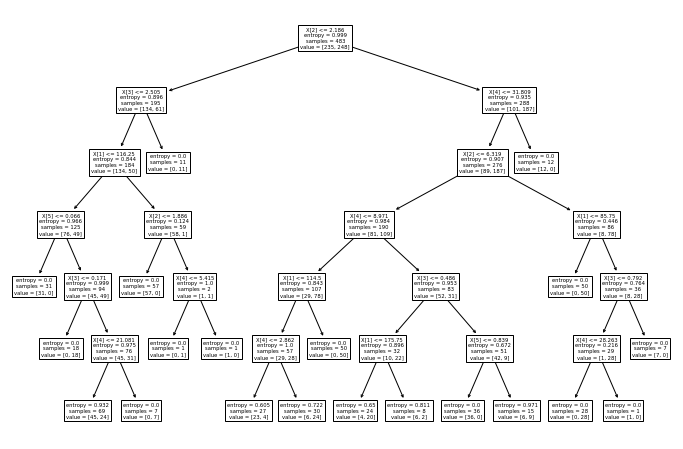

In [48]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 
plt.show()

In [ ]:

tree.export_graphviz(clf_en,
                     out_file="tree.dot",
                     feature_names = features, 
                     class_names=classnames,
                     filled = True)
#dot -Tpng tree.dot -o tree.png
#in anaconda prompt to convert tree.dot into tree.png

In [49]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred_en)
cfm

array([[106,  20],
       [ 23,  90]], dtype=int64)

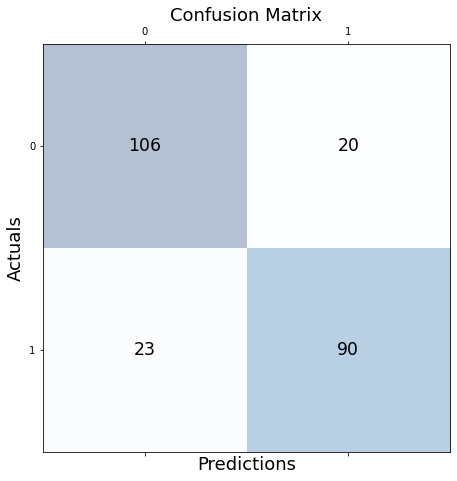

In [50]:
from sklearn.metrics import  confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_en)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
if accuracy_score(y_test, y_pred_gini) > accuracy_score(y_train, y_pred_train_en):
       print("Gini Index Criterion is Better and it has accuracy equal to ", accuracy_score(y_test, y_pred_gini)*100) 
else:
    print("Entropy Criterion is Better and it has accuracy equal to ", accuracy_score(y_train, y_pred_train_en)*100)

Entropy Criterion is Better and it has accuracy equal to  90.47619047619048
